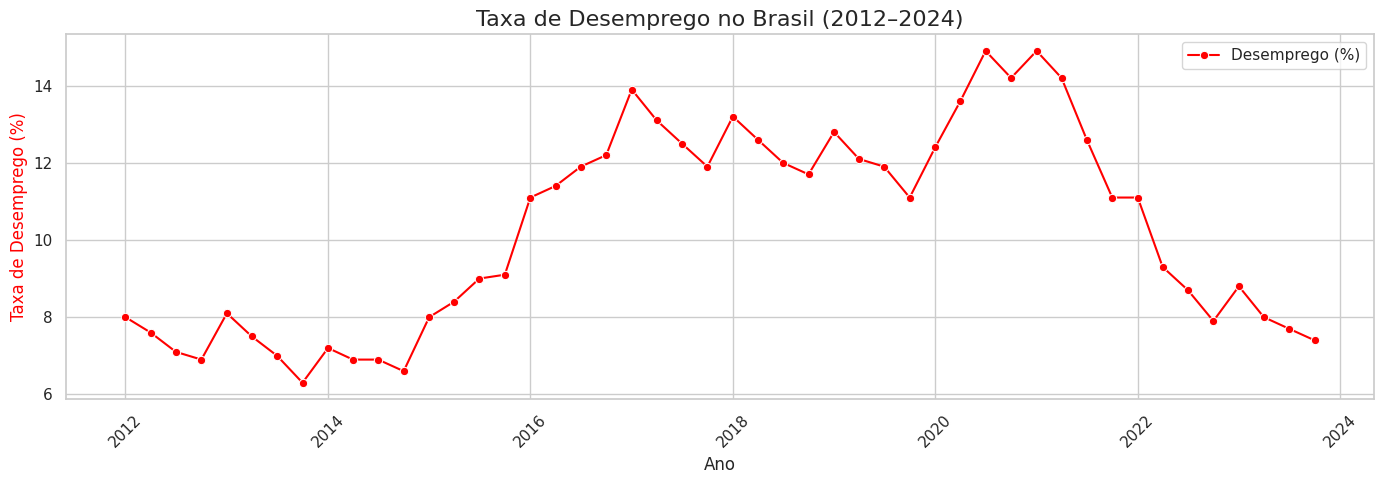

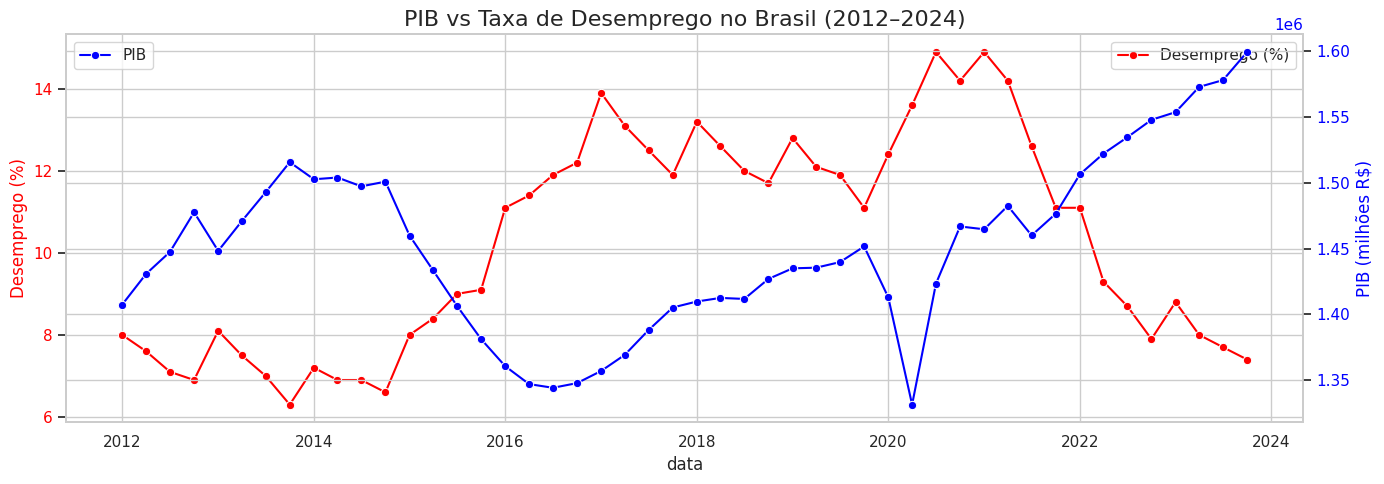

📉 Correlação entre PIB e Desemprego: -0.5573


In [24]:
# ===============================
# IMPORTAÇÕES
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style="whitegrid")

# ===============================
# FUNÇÃO PARA CONVERTER TRIMESTRE EM DATA
# ===============================
def converter_para_data(trimestre):
    partes = trimestre.split(' ')
    if len(partes) != 3:
        return None
    numero_trimestre = partes[0][0]
    ano = partes[2]
    meses = {'1': '01-01', '2': '04-01', '3': '07-01', '4': '10-01'}
    return pd.to_datetime(f"{ano}-{meses.get(numero_trimestre)}")

# ===============================
# 1. LEITURA E TRATAMENTO DA TABELA DE DESEMPREGO
# ===============================
# Arquivo salvo localmente no ambiente Colab
arquivo_desemprego = 'Tabela 6368.xlsx'

# Leitura
df_raw = pd.read_excel(arquivo_desemprego, header=None)
trimestres = df_raw.iloc[0]
taxas = df_raw.iloc[1]

# DataFrame formatado
df_desemprego = pd.DataFrame({
    'trimestre': trimestres,
    'taxa_desemprego': taxas
})

# Conversão para datas
df_desemprego['data'] = df_desemprego['trimestre'].apply(converter_para_data)
df_desemprego = df_desemprego[['data', 'taxa_desemprego']].sort_values('data').reset_index(drop=True)

# ===============================
# 2. LEITURA E TRATAMENTO DO PIB
# ===============================
arquivo_pib = 'pibBrasil.xlsx'
df_pib_raw = pd.read_excel(arquivo_pib)

# Transformar em formato longo
df_pib = pd.melt(df_pib_raw, id_vars=['Ano'],
                 value_vars=['1º Trim.', '2º Trim.', '3º Trim.', '4º Trim.'],
                 var_name='trimestre', value_name='PIB')

# Criar coluna combinada e converter para data
df_pib['trimestre_completo'] = df_pib['trimestre'] + ' ' + df_pib['Ano'].astype(str)
df_pib['data'] = df_pib['trimestre_completo'].apply(converter_para_data)
df_pib = df_pib[['data', 'PIB']].sort_values('data').reset_index(drop=True)

# ===============================
# 3. JUNÇÃO DAS BASES
# ===============================
df_merged = pd.merge(df_desemprego, df_pib, on='data')

# ===============================
# 4. VISUALIZAÇÃO GRÁFICA
# ===============================
plt.figure(figsize=(14, 5))
sns.lineplot(data=df_merged, x='data', y='taxa_desemprego', color='red', marker='o', label='Desemprego (%)')
plt.ylabel('Taxa de Desemprego (%)', color='red')
plt.xlabel('Ano')
plt.title('Taxa de Desemprego no Brasil (2012–2024)', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico comparativo
fig, ax1 = plt.subplots(figsize=(14, 5))

# Desemprego (eixo 1)
sns.lineplot(data=df_merged, x='data', y='taxa_desemprego', ax=ax1, color='red', marker='o', label='Desemprego (%)')
ax1.set_ylabel('Desemprego (%)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# PIB (eixo 2)
ax2 = ax1.twinx()
sns.lineplot(data=df_merged, x='data', y='PIB', ax=ax2, color='blue', marker='o', label='PIB')
ax2.set_ylabel('PIB (milhões R$)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('PIB vs Taxa de Desemprego no Brasil (2012–2024)', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# 5. ANÁLISE DE CORRELAÇÃO
# ===============================
correlacao = df_merged['taxa_desemprego'].corr(df_merged['PIB'])
print(f'📉 Correlação entre PIB e Desemprego: {correlacao:.4f}')
